[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jesherjoshua/dsc-ml-workshop/blob/mothership/digits-classification.ipynb)


# **Digits Classification** 🔢


# Imports


In [2]:
import numpy as np
import pickle
import pandas as pd
import sklearn as skl
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error


# STEP-1: Load Data ⬇️


In [ ]:
#!git clone https://github.com/jesherjoshua/dsc-datasets.git

In [4]:
df = datasets.load_digits()

In [6]:
dir(df)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
type(df)


sklearn.utils._bunch.Bunch

In [11]:
df.head()

AttributeError: head

# STEP-2: Clean and Explore 🧹


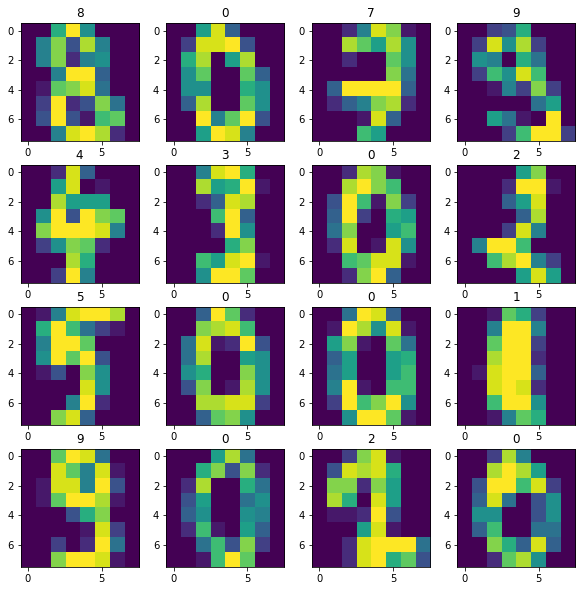

In [16]:
fig,ax=plt.subplots(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    n=np.random.randint(1,1797)
    plt.imshow(df.images[n])
    plt.title(df.target[n])
    

# STEP-3: Encode and Transform


In [17]:
x_train, x_test, y_train, y_test = train_test_split(df.data,df.target, test_size=0.3
)


# STEP-4: Train 🏋️‍♂️


In [18]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.predict(x_test)


/Users/jesherjoshua/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([7, 1, 0, 1, 1, 1, 3, 3, 6, 8, 8, 6, 5, 7, 1, 0, 9, 3, 8, 1, 1, 3,
       3, 3, 7, 8, 0, 5, 0, 0, 6, 7, 7, 6, 9, 7, 2, 5, 6, 8, 5, 0, 7, 0,
       0, 6, 2, 8, 5, 3, 5, 3, 1, 6, 9, 0, 5, 4, 1, 5, 7, 3, 7, 1, 6, 5,
       0, 7, 6, 4, 8, 4, 4, 4, 5, 0, 9, 9, 7, 9, 2, 3, 4, 7, 9, 0, 0, 8,
       3, 1, 6, 1, 4, 8, 3, 3, 8, 1, 0, 7, 7, 6, 5, 6, 1, 3, 9, 7, 7, 4,
       2, 1, 0, 3, 4, 3, 5, 7, 1, 8, 1, 5, 8, 1, 6, 4, 5, 2, 5, 1, 1, 3,
       5, 5, 1, 1, 3, 3, 2, 6, 6, 0, 2, 2, 2, 8, 2, 3, 6, 1, 0, 0, 4, 3,
       2, 7, 6, 6, 6, 3, 4, 4, 6, 0, 8, 9, 7, 7, 1, 2, 2, 0, 4, 3, 0, 9,
       3, 3, 7, 3, 6, 8, 5, 6, 2, 3, 4, 4, 7, 5, 7, 6, 3, 5, 3, 4, 7, 8,
       6, 3, 3, 3, 3, 5, 7, 6, 4, 5, 1, 7, 7, 5, 3, 2, 2, 9, 5, 1, 1, 1,
       1, 0, 2, 1, 2, 1, 2, 9, 9, 1, 6, 0, 0, 1, 2, 0, 3, 8, 9, 2, 5, 6,
       2, 6, 9, 1, 3, 2, 4, 2, 3, 3, 5, 3, 6, 8, 6, 8, 8, 7, 7, 6, 1, 2,
       1, 5, 4, 4, 9, 6, 2, 3, 8, 6, 1, 6, 6, 4, 2, 8, 6, 4, 7, 9, 2, 3,
       1, 5, 0, 5, 0, 3, 1, 9, 1, 7, 8, 0, 8, 0, 3,

# STEP-5: Evaluate 🕵️‍♂️


In [21]:
print("Accuracy: ", lr.score(x_test, y_test))
print(skl.metrics.classification_report(y_test,lr.predict(x_test)))



Accuracy:  0.9703703703703703
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.97      0.94        61
           2       1.00      1.00      1.00        51
           3       0.98      0.97      0.98        65
           4       1.00      0.93      0.96        44
           5       1.00      0.98      0.99        50
           6       0.98      0.98      0.98        64
           7       0.98      0.98      0.98        54
           8       0.89      0.92      0.91        52
           9       0.96      0.96      0.96        49

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



Text(0.5, 0.98, 'Confusion Matrix')

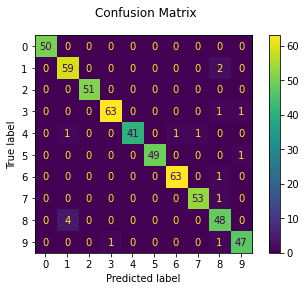

In [23]:
disp = skl.metrics.ConfusionMatrixDisplay.from_predictions(y_test, lr.predict(x_test))
disp.figure_.suptitle("Confusion Matrix")
#print(f"Confusion matrix:\n{disp.confusion_matrix}")

# STEP-6: Deploy 🚀


In [97]:
pickle.dump(lr, open("logisticreg_classification.pkl", "wb"))


In [98]:
model = pickle.load(open("logisticreg_classification.pkl", "rb"))


In [100]:
model.score(x_test, y_test)


0.9582809440144029

_proceed to deploy.py..._
